#Detecting hate speech on Twitter



**Business Problem**

Detecting hate speech on Twitter involves using machine learning to identify tweets that promote hatred or violence based on protected characteristics. Twitter faces the challenge of balancing free expression with preventing harm, and automated detection helps flag harmful content for human review. This process involves analyzing text for patterns and sentiment indicative of hate speech, with models trained on labeled data. Effective detection fosters a safer, more inclusive community and helps maintain Twitter's community standards, promoting healthy public discourse.




---



**Solution Description**


*   Data Preparation: Clean and preprocess the tweet data, then split it into training and validation sets.
* Model Definition: Define the neural network architecture in TensorFlow, including embedding layers, dense layers, dropout layers, and output layers.  
*  Model Compilation: Compile the model with the appropriate loss function, optimizer, and metrics.
*   Model Training: Train the model on the training data, using early stopping to prevent overfitting and monitoring performance on the validation set.

* Model Evaluation: Evaluate the trained model on the test set, assessing performance metrics such as accuracy, precision, recall, and F1-score.



---

**Dataset Description**

Selected Davidson dataset has over 24,000 entries, covering a wide range of hate speech scenarios and user-generated content from Tweeter platform. Each tweet is labeled as hate speech, offensive language, or neutral content.

Dataset Structure

count: Number of occurrences/interactions of the tweet.

hate_speech: Indicates the presence of hate speech in the tweet.

offensive_language: Indicates the presence of offensive language in the tweet.

neither: Indicates the tweet does not contain hate speech or offensive language.

class: Categorization of the tweet in original dataset ( 1 = normal speech, 0 = hate speech).

Label-wise counts:


Hate speech -20609

Normal speech- 4159

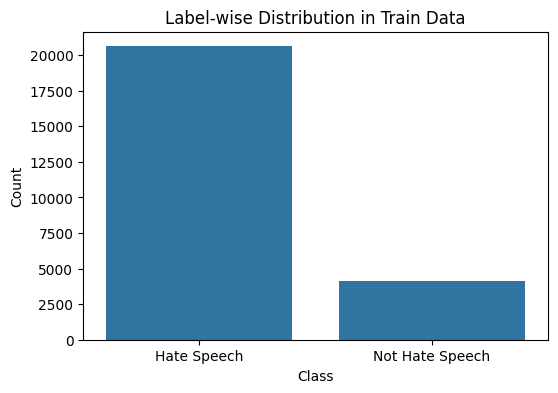

---
 **Train, Test and Validation Test data size**


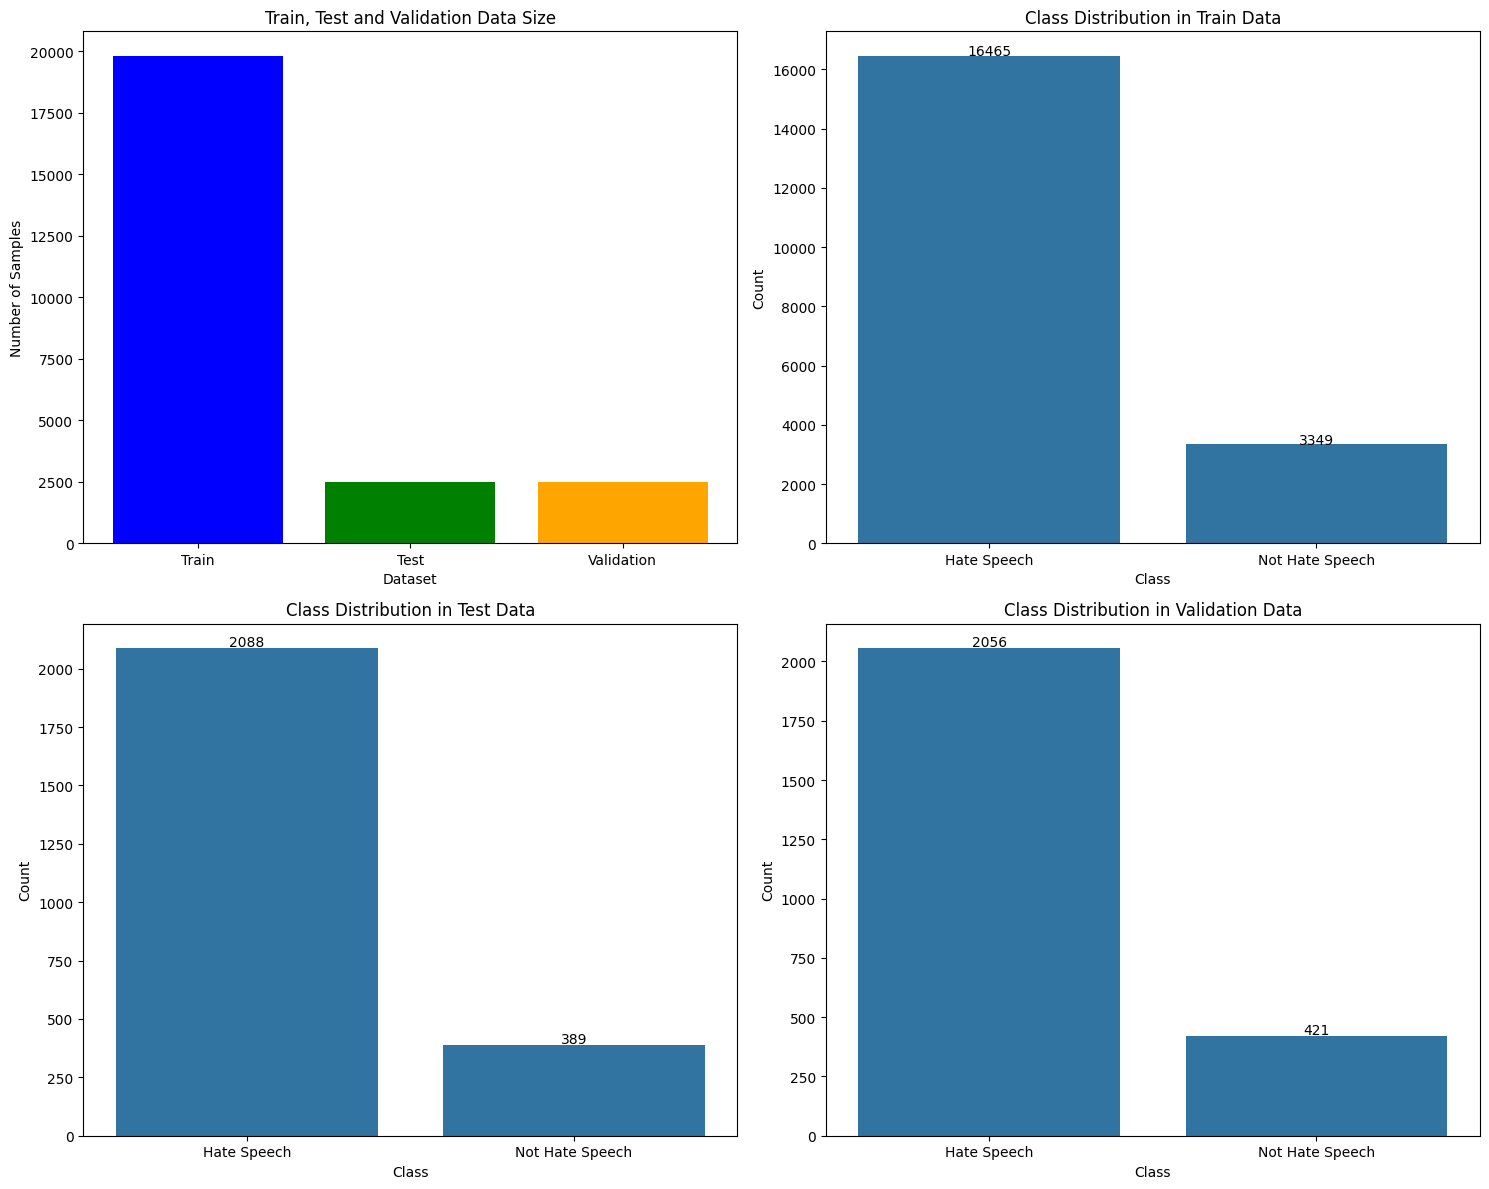

---

**Modle Summary**
**Confusion Matrix and Classification Report**

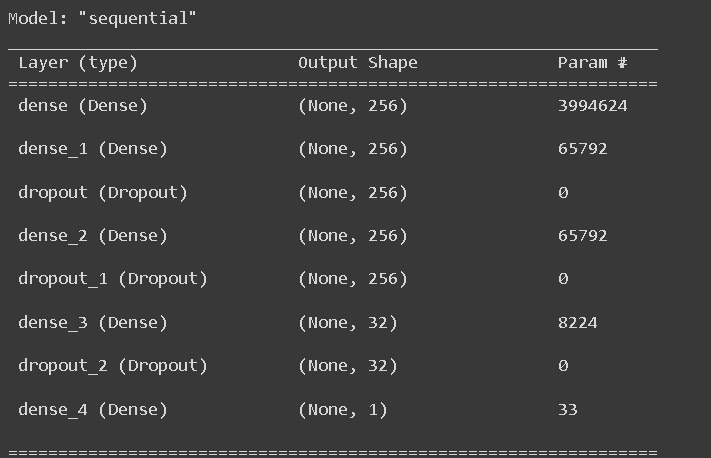

---

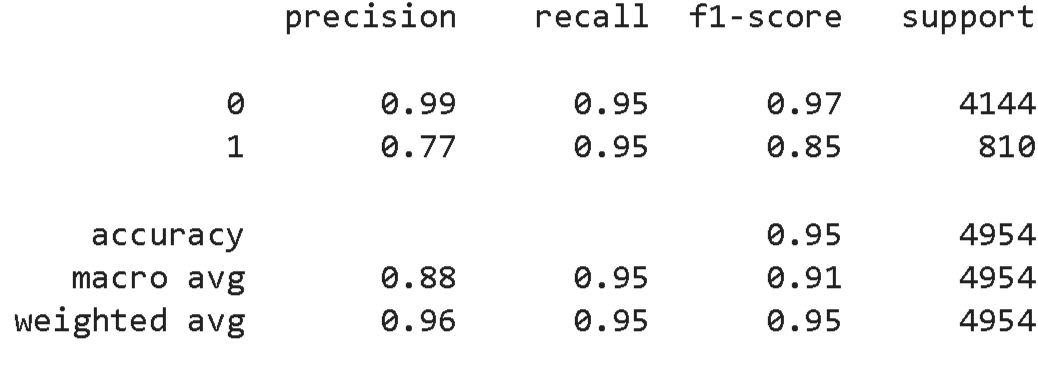
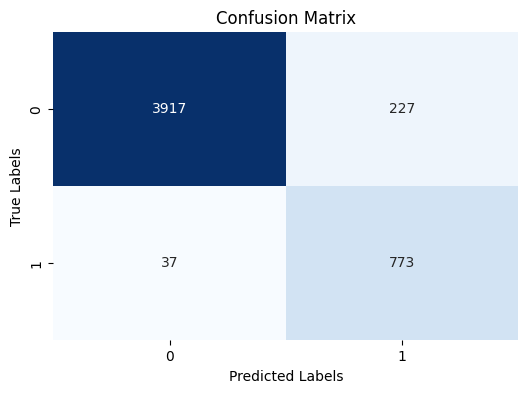




In [1]:
!pip install emoji contractions imblearn
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import contractions
import emoji
import html
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
import pandas as pd
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
model = load_model('text_classification_model.h5')

In [2]:

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to decode HTML entities
def decode_html_entities(text):
    return html.unescape(text)

# Function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Function to convert emojis to words
def convert_emojis_to_words(text):
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = re.sub(r'(:\w+:)', r' \1 ', text)
    return text
# Function to perform lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]


# Normalize text
def normalize_text(text):
    text = text.lower()
    text = decode_html_entities(text)
    text = convert_emojis_to_words(text)
    text = expand_contractions(text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'&', 'and', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'(.)\1+', r'\1', text)
    return text
def preprocess_test_cases(test_cases):
    test_cases_normalized = [normalize_text(text) for text in test_cases]
    # Tokenization
    test_cases_tokenized = [word_tokenize(text) for text in test_cases_normalized]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    test_cases_no_stopwords = [[word for word in tokens if word not in stop_words] for tokens in test_cases_tokenized]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    test_cases_lemmatized = [[lemmatizer.lemmatize(word) for word in tokens] for tokens in test_cases_no_stopwords]
    # Join tokens
    test_cases_joined = [' '.join(tokens) for tokens in test_cases_lemmatized]
    return test_cases_joined

In [5]:
# Define test cases
test_cases = [
    "#Iowa is full of white trash",
    "&#8220;@AbstractLife: @NigelDixon1 @SeanTHarrington Orton is idc&#8221; he ain't been playing. Trashlex Smith only sat out Kaep took his spot.",
    "&#8220;@G_Anderson4: I'm Dre's a bitch tho&#8221; &#128527;",
    "- Dis be heaven fo a colored man",
    "&#8220;@LakeshoreJohnny: Eliot was a pussy.&#8221; MMMMMETHER",
    "don't let your side bitch settle in, I might have to headbutt you Evelyn",

]

In [6]:

# Preprocess test cases
test_cases_processed = preprocess_test_cases(test_cases)
# Load TfidfVectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_loaded = pickle.load(f)

# Vectorize test cases using the loaded TfidfVectorizer
test_cases_tfidf = tfidf_loaded.transform(test_cases_processed)

# Convert sparse matrix to dense tensor
test_cases_dense = test_cases_tfidf.toarray()

# Make predictions
predictions = model.predict(test_cases_dense)
predicted_classes = (predictions > 0.5).astype("int32").flatten()

# Display results
results_df = pd.DataFrame({'Text': test_cases, 'Predicted Class': predicted_classes})

for i, text in enumerate(test_cases):
    label = "Hate Speech" if predicted_classes[i] == 0 else "Not Hate Speech"
    print(f'Text: "{text}" - Predicted Label: {label}')


1/1 [==============================] - 0s 310ms/step
Text: "#Iowa is full of white trash" - Predicted Label: Hate Speech
Text: "&#8220;@AbstractLife: @NigelDixon1 @SeanTHarrington Orton is idc&#8221; he ain't been playing. Trashlex Smith only sat out Kaep took his spot." - Predicted Label: Not Hate Speech
Text: "&#8220;@G_Anderson4: I'm Dre's a bitch tho&#8221; &#128527;" - Predicted Label: Hate Speech
Text: "- Dis be heaven fo a colored man" - Predicted Label: Not Hate Speech
Text: "&#8220;@LakeshoreJohnny: Eliot was a pussy.&#8221; MMMMMETHER" - Predicted Label: Hate Speech
Text: "don't let your side bitch settle in, I might have to headbutt you Evelyn" - Predicted Label: Hate Speech
